In [2]:
import pandas as pd
movies=pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.shape

(9742, 3)

In [5]:
ratings=pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\ratings.csv")
ratings.shape

(100836, 4)

In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
unique_user_ids = ratings['userId'].nunique()
print(f'unique_id:{unique_user_ids}')

unique_id:610


In [59]:
import pandas as pd
df = pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\ratings.csv")
ratings_count = df.groupby('movieId').size().reset_index(name='ratings_count')
max_ratings_index = ratings_count['ratings_count'].idxmax()
max_ratings_movie_id = ratings_count.loc[max_ratings_index, 'movieId']
movies_df = pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\movies.csv")
max_ratings_movie_info = movies_df[movies_df['movieId'] == max_ratings_movie_id]
print("Movie with the maximum number of user ratings:")
print(max_ratings_movie_info)


Movie with the maximum number of user ratings:
     movieId                title                    genres
314      356  Forrest Gump (1994)  Comedy|Drama|Romance|War


In [58]:
import pandas as pd
tags_df = pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\tags.csv")
matrix_movie_id = 2571  # Replace with the actual movieId
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]
print("Tags for 'Matrix, The (1999)':")
print(matrix_tags['tag'])


Tags for 'Matrix, The (1999)':
815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object


In [57]:
import pandas as pd
ratings_df = pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\ratings.csv")
terminator_movie_id = 480
terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]
average_rating = terminator_ratings['rating'].mean()
print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {average_rating:.2f}")


Average user rating for 'Terminator 2: Judgment Day (1991)': 3.75


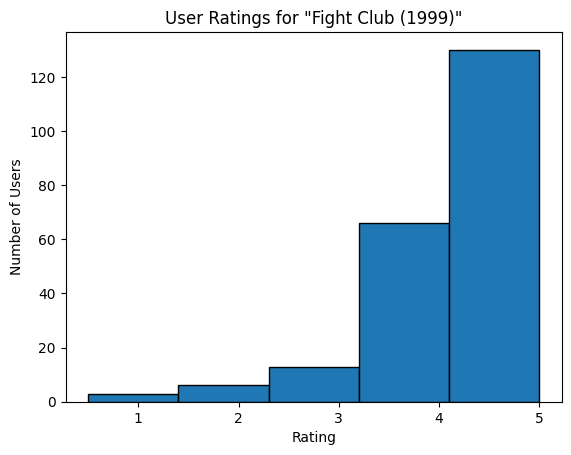

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
ratings_df = pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\ratings.csv")
fight_club_movie_id = 2959  # Replace with the actual movieId
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]

# Plot a histogram of user ratings
plt.hist(fight_club_ratings['rating'], bins=5, edgecolor='black')
plt.title('User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()


In [55]:
import pandas as pd
ratings_df = pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\ratings.csv")
movies_df = pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\movies.csv")
grouped_ratings = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged_data = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')
filtered_data = merged_data[merged_data['count'] > 50]
print(filtered_data.head())


   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  count      mean  
0  Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                   Adventure|Children|Fantasy    110  3.431818  
2                               Comedy|Romance     52  3.259615  
5                        Action|Crime|Thriller    102  3.946078  
6                               Comedy|Romance     54  3.185185  


In [54]:
# Find the movie with the highest average user rating
most_popular_movie = filtered_data.loc[filtered_data['mean'].idxmax()]
print("Most Popular Movie based on Average User Ratings:")
print(most_popular_movie[['title', 'mean']])


Most Popular Movie based on Average User Ratings:
title    Shawshank Redemption, The (1994)
mean                             4.429022
Name: 277, dtype: object


In [53]:
top_popular_movies = filtered_data.sort_values(by='count', ascending=False)
# Select the top 5 popular movies
top_5_popular_movies = top_popular_movies.head(5)
print("Top 5 Popular Movies based on Number of User Ratings:")
print(top_5_popular_movies[['title', 'count']])


Top 5 Popular Movies based on Number of User Ratings:
                                 title  count
314                Forrest Gump (1994)    329
277   Shawshank Redemption, The (1994)    317
257                Pulp Fiction (1994)    307
510   Silence of the Lambs, The (1991)    279
1938                Matrix, The (1999)    278


In [32]:
# Assuming 'filtered_data' is the DataFrame obtained after the mandatory operations
# Filter only Sci-Fi movies
sci_fi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi', case=False)]
top_sci_fi_movies = sci_fi_movies.sort_values(by='count', ascending=False)
third_most_popular_sci_fi_movie = top_sci_fi_movies.iloc[2]
print("Third Most Popular Sci-Fi Movie based on Number of User Ratings:")
print(third_most_popular_sci_fi_movie[['title', 'count']])


Third Most Popular Sci-Fi Movie based on Number of User Ratings:
title    Jurassic Park (1993)
count                     238
Name: 418, dtype: object


In [36]:
import pandas as pd
links_df = pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\links.csv")
print(links_df.head())


   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


In [52]:
import pandas as pd
links_df = pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\links.csv")
ratings_df = pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\ratings.csv")
merged_data = pd.merge(links_df, ratings_df, on='movieId', how='inner')
highest_imdb_movie_id = merged_data.loc[merged_data['rating'].idxmax(), 'movieId']
print("MovieId with the Highest IMDb Rating:", highest_imdb_movie_id)


MovieId with the Highest IMDb Rating: 1


In [51]:
import pandas as pd
movies_df = pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\movies.csv")
ratings_df = pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\ratings.csv")
merged_data = pd.merge(movies_df, ratings_df, on='movieId', how='inner')
sci_fi_movies = merged_data[merged_data['genres'].str.contains('Sci-Fi', case=False)]
highest_imdb_sci_fi_movie_id = sci_fi_movies.loc[sci_fi_movies['rating'].idxmax(), 'movieId']

print("MovieId of the Sci-Fi Movie with the Highest IMDb Rating:", highest_imdb_sci_fi_movie_id)


MovieId of the Sci-Fi Movie with the Highest IMDb Rating: 24
